![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

<h2 style="color: #00BFFF;">Lab - Experimenting with CNN Architecture</h2>

<h3 style="color: #0099CC;">Prerequisites:</h3>

Before starting this lab, make sure you are familiar with:
- Convolutional Neural Networks (CNNs)
- PyTorch basics
- Building and training neural networks

In [1]:
import cv2 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Challenge 1: Understanding Convolutional Layers

In this exercise, you will modify the number of filters in a convolutional layer and observe the impact on the feature maps.

### Instructions:
- Define a simple CNN with one convolutional layer.
- Change the number of filters in the convolutional layer.
- Visualize the feature maps after the convolution operation.

### Task:
1. Start with a CNN that has a single convolutional layer with 16 filters.
2. Apply a 3x3 kernel, stride of 1, and no padding.
3. Pass a sample image through the network and visualize the output feature maps.

In [2]:
# Preloaded for students
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Transform for resizing (no need for ToTensor as we're manually handling the image)
transform = transforms.Compose([
    transforms.Resize((32, 32))   # Resize image to 32x32
])

# Load grayscale image (1 channel)
sample_image = cv2.imread('/Users/imb/2024/ironhack/data_curriculum/ai-computer-vision/img/cat.png', 0) # 0 for grayscale

# Convert the image to a PyTorch tensor and add batch and channel dimensions
sample_image = torch.tensor(sample_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Function to visualize feature maps
def visualize_feature_maps(feature_maps):
    num_filters = feature_maps.shape[1]
    fig, axs = plt.subplots(1, num_filters, figsize=(15, 15))
    for i in range(num_filters):
        axs[i].imshow(feature_maps[0, i].detach().numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()


In [3]:
# Student's task solution
class SimpleCNN(nn.Module):
    def __init__(self, num_filters=16):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=3, stride=1, padding=0)

    def forward(self, x):
        x = self.conv1(x)
        return x

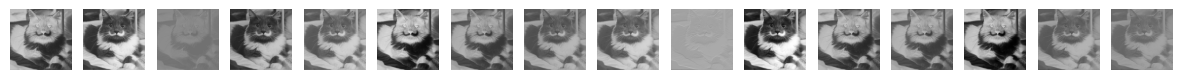

In [4]:
# Preloaded for students
model = SimpleCNN()
output = model(sample_image)
visualize_feature_maps(output)

## Challenge 2: Experimenting with Pooling Layers

Explore the effects of different pooling strategies on feature maps.

### Instructions:
- Define a CNN with max pooling and average pooling layers.
- Compare the effects of each pooling strategy on the size of the feature maps.

### Task:
1. Build a CNN with one convolutional layer followed by both max pooling and average pooling layers.
2. Use a 2x2 kernel for the pooling layers.
3. Pass a sample image through both networks and compare the resulting feature maps.

In [5]:
# Preloaded for students
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.Resize((32, 32))   
])

sample_image = cv2.imread('/Users/imb/2024/ironhack/data_curriculum/ai-computer-vision/img/cat.png', 0)

if sample_image is None:
    raise FileNotFoundError("The image file was not found. Please check the path and try again.")

sample_image = torch.tensor(sample_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

def visualize_feature_maps(feature_maps):
    num_filters = feature_maps.shape[1]
    fig, axs = plt.subplots(1, num_filters, figsize=(15, 15))
    for i in range(num_filters):
        axs[i].imshow(feature_maps[0, i].detach().numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()

Max Pooling Feature Maps:


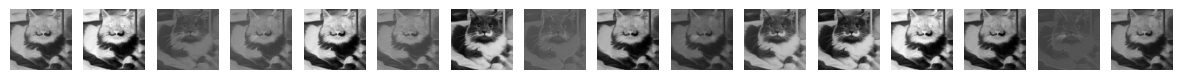

Average Pooling Feature Maps:


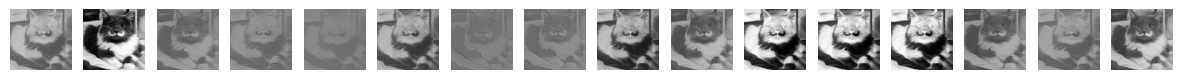

In [6]:
# Student's task solution
class CNNWithPooling(nn.Module):
    def __init__(self, pooling_type='max'):
        super(CNNWithPooling, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0)
        
        if pooling_type == 'max':
            self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        elif pooling_type == 'avg':
            self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        return x

# Instantiate two models: one with max pooling and one with average pooling
model_max_pool = CNNWithPooling(pooling_type='max')
model_avg_pool = CNNWithPooling(pooling_type='avg')

# Pass the sample image through both networks
output_max_pool = model_max_pool(sample_image)
output_avg_pool = model_avg_pool(sample_image)

# Visualize the resulting feature maps
print("Max Pooling Feature Maps:")
visualize_feature_maps(output_max_pool)

print("Average Pooling Feature Maps:")
visualize_feature_maps(output_avg_pool)

## Challenge 3: Adjusting Hyperparameters

Investigate the effect of changing kernel size, stride, and padding on feature maps.

### Instructions:
- Modify the kernel size, stride, and padding in a convolutional layer.
- Observe the impact of these changes on the output feature map size.

### Task:
1. Use a CNN with different kernel sizes (3x3, 5x5) and strides (1, 2).
2. Add padding to ensure the output size is the same as the input size.
3. Print the size of the output feature maps for each configuration.

In [7]:
# Preloaded for students
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((32, 32))
])

sample_image = cv2.imread('/Users/imb/2024/ironhack/data_curriculum/ai-computer-vision/img/cat.png', 0)

if sample_image is None:
    raise FileNotFoundError("The image file was not found. Please check the path and try again.")

sample_image = torch.tensor(sample_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

In [8]:
# Student's task solution
class HyperparamCNN(nn.Module):
    def __init__(self, kernel_size, stride, padding):
        super(HyperparamCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=kernel_size, stride=stride, padding=padding)

    def forward(self, x):
        return self.conv1(x)

Kernel Size: 3, Stride: 1, Padding: 1 -> Output size: torch.Size([1, 16, 715, 718])


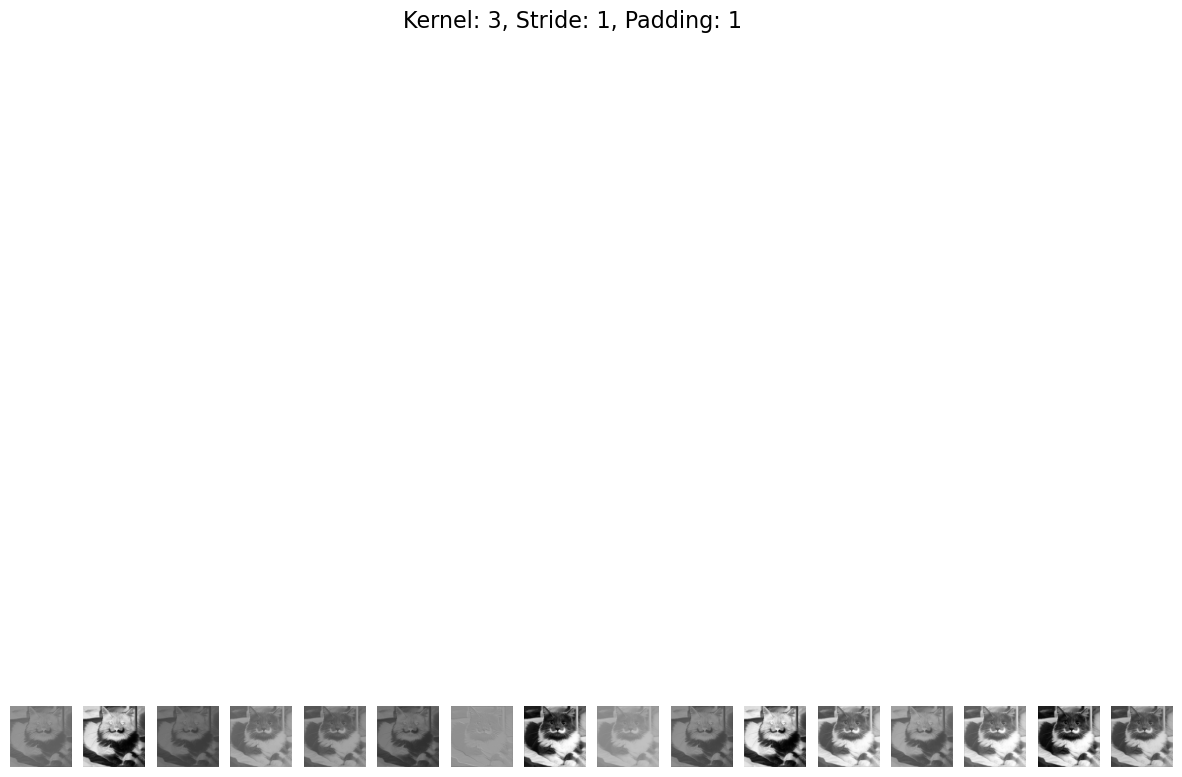

Kernel Size: 5, Stride: 2, Padding: 2 -> Output size: torch.Size([1, 16, 358, 359])


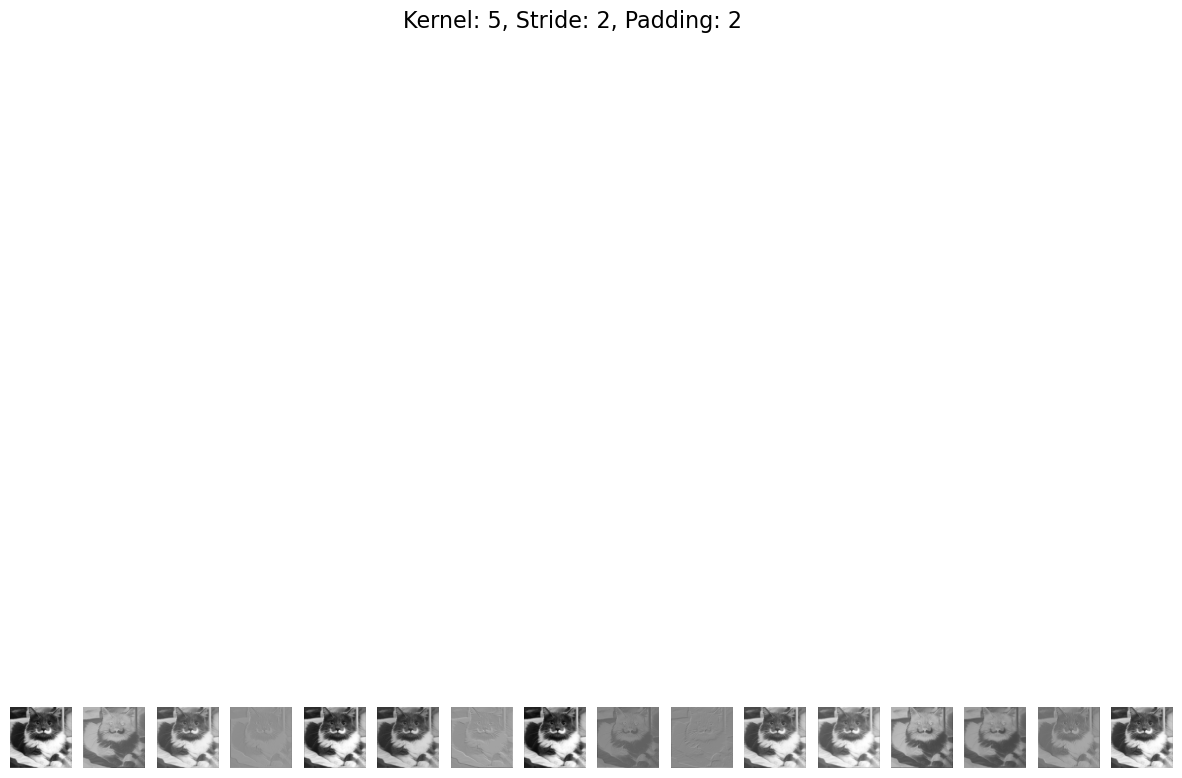

In [9]:
# Preloaded for students
def visualize_feature_maps(feature_maps, kernel_size, stride, padding):
    num_filters = feature_maps.shape[1]
    fig, axs = plt.subplots(1, num_filters, figsize=(15, 15))
    fig.suptitle(f"Kernel: {kernel_size}, Stride: {stride}, Padding: {padding}", fontsize=16)
    for i in range(num_filters):
        axs[i].imshow(feature_maps[0, i].detach().numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()

for kernel_size, stride, padding in [(3, 1, 1), (5, 2, 2)]:
    model = HyperparamCNN(kernel_size=kernel_size, stride=stride, padding=padding)
    output = model(sample_image)
    
    print(f"Kernel Size: {kernel_size}, Stride: {stride}, Padding: {padding} -> Output size: {output.size()}")
    visualize_feature_maps(output, kernel_size, stride, padding)